# Academic Integrity Statement

### I (we) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work.

# Common Implementation

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# set random seed value for reproducibility of the result
seed_val = 574

# Part-3 Linear Regression

## Data Analysis - diamonds.csv

In [131]:
!ls

diamonds.csv  sample_data


In [132]:
diamond_df = pd.read_csv("diamonds.csv")
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [133]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [134]:
diamond_df['cut'] = pd.Categorical(diamond_df['cut'])
diamond_df['color'] = pd.Categorical(diamond_df['color'])
diamond_df['clarity'] = pd.Categorical(diamond_df['clarity'])

In [135]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  53940 non-null  int64   
 1   carat       53940 non-null  float64 
 2   cut         53940 non-null  category
 3   color       53940 non-null  category
 4   clarity     53940 non-null  category
 5   depth       53940 non-null  float64 
 6   table       53940 non-null  float64 
 7   price       53940 non-null  int64   
 8   x           53940 non-null  float64 
 9   y           53940 non-null  float64 
 10  z           53940 non-null  float64 
dtypes: category(3), float64(6), int64(2)
memory usage: 3.4 MB


In [136]:
# number of unique values in Unnamed column is same as that of the total samples in the dataset.
diamond_df['Unnamed: 0'].nunique()

53940

In [137]:
# dropping 'Unnamed: 0' , as it is same as the index

diamond_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [138]:
diamond_df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [139]:
# Basic statistics of numerical features
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [140]:
# Diamond cut order
# Premium > Ideal > Very Good > Good > Fair
diamond_df.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

In [141]:
# Diamond clarity in the order from high to low
# IF > VVS1 > VVS2 > VS1 > VS2 > SI1 > SI2 > I1
#
# Reference - https://www.diamonds.pro/education/clarity/

diamond_df.clarity.unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']

In [142]:
diamond_df.color.unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

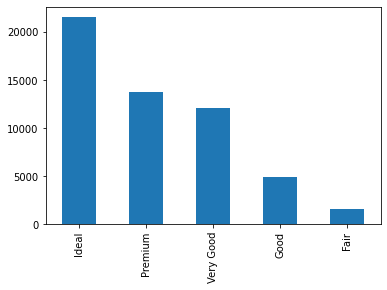

In [143]:
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_cols = ['cut', 'color', 'clarity']

# total count of each category in the feature 'cut'
diamond_df['cut'].value_counts().plot(kind='bar')

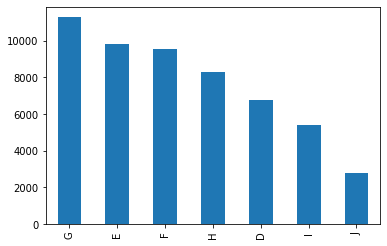

In [144]:
# total count of each category in the feature 'color'
diamond_df['color'].value_counts().plot(kind='bar')

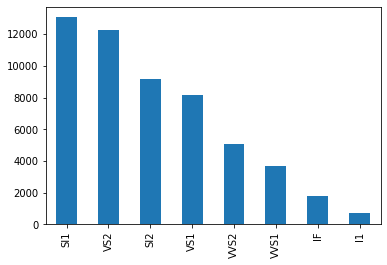

In [145]:
# total count of each category in the feature 'clarity'
diamond_df['clarity'].value_counts().plot(kind='bar')

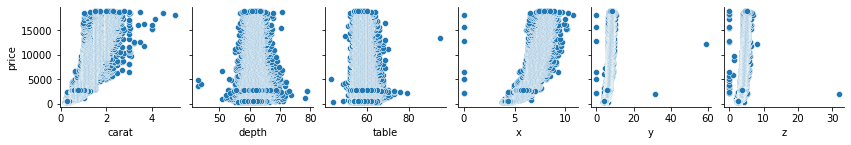

In [146]:
# Pair-plot to understand the distribution and relationship of numerical features with the target value - price
sns.pairplot(
    data=diamond_df,
    x_vars=numerical_cols, 
    y_vars="price", 
    height=2
)

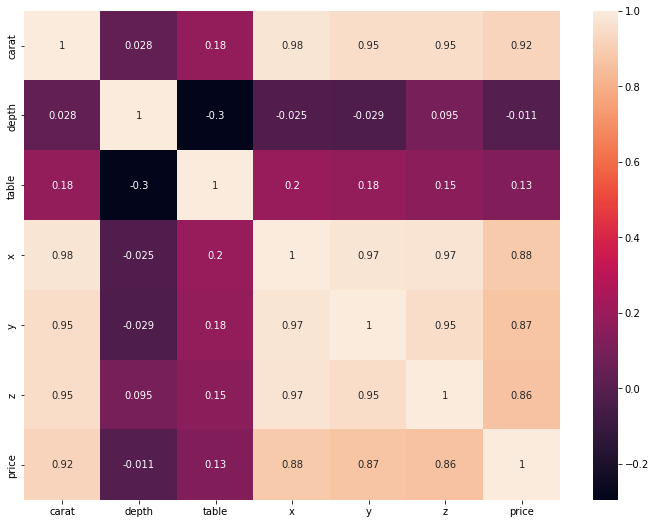

In [147]:
# Correlation heatmap for numerical features in the dataset
figure, axes = plt.subplots(figsize=(12,9)) 
sns.heatmap(diamond_df[numerical_cols+['price']].corr(), annot=True, ax=axes)

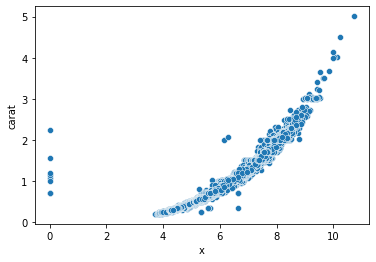

In [148]:
sns.scatterplot(data=diamond_df, x="x", y="carat")

In [149]:
# Data Preprocessing
processed_df = diamond_df.copy()

# Ordinal Encoding
processed_df['cut'].replace(['Premium', 'Ideal', 'Very Good', 'Good', 'Fair'],  
                        [5, 4, 3, 2, 1], inplace=True)
processed_df['clarity'].replace(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'],
                                [8, 7, 6, 5, 4, 3, 2, 1], inplace=True)

# dropping color feature
processed_df.drop(['color'], axis=1, inplace=True)

# Rescaling numeric columns to the range [0,1]
processed_df[numerical_cols]=((processed_df[numerical_cols] - processed_df[numerical_cols].min())/
                        (processed_df[numerical_cols].max() - processed_df[numerical_cols].min()))

In [150]:
processed_df.head(3)

,carat,cut,clarity,depth,table,price,x,y,z
0,0.006237,4,2,0.513889,0.230769,326,0.367784,0.067572,0.076415
1,0.002079,5,3,0.466667,0.346154,326,0.362197,0.065195,0.072642
2,0.006237,2,5,0.386111,0.423077,327,0.377095,0.069100,0.072642


In [223]:
# Splitting dataset into train (80%) and test (20%)
train_df = processed_df.sample(frac=0.8, random_state=seed_val)
test_df = processed_df.drop(train_df.index)

In [224]:
Y_train = train_df['price']
X_train = train_df.drop(['price'], axis=1)

Y_test = test_df['price']
X_test = test_df.drop(['price'], axis=1)

In [225]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((43152, 8), (43152,), (10788, 8), (10788,))

### Ordinary Least Squares

In [232]:
class LinearRegression:

  def __init__(self, bias=True, seed=seed_val):
    self.weights = 0
    self.is_bias = bias


  def add_bias(self, X):
    '''
      Input:
        feature matrix, X
      Return:
        feature matrix with bias column of value 1
    '''
    bias_vector = np.ones((X.shape[0], 1))  #  creating bias vector (N x 1), where N is the number of samples
    return np.concatenate((bias_vector, X), axis=1)  # concatenating bias vector with input features


  def calculate_weight(self, X, Y):
    '''
      Input:
        feature matrix, X
        target, Y
      Return:
        weight vector
    '''
    inverse = np.linalg.inv(np.dot(X.T, X))
    weight = np.dot(inverse, np.dot(X.T, Y))
    return weight


  def fit(self, X, Y):
    '''
      Input:
        X: Input feature matrix
        Y: target values
        bias: Boolean - indicates 
    '''
    if self.is_bias:
      X = self.add_bias(X)

    self.weights = self.calculate_weight(X, Y)
    return self.weights


  def predict(self, X):
    if self.is_bias:
      X = self.add_bias(X)
    return np.dot(X, self.weights)

  def get_weights(self):
    return self.weights

  def mse_score(self, true_val, predicted):
    '''
      Input:
        true_val : the ground truth value 
        predicted : values calculated using OLS
      Return:
        mean square error value
    '''
    return ((true_val - predicted)**2).mean()

In [233]:
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)

pred_train = model_lr.predict(X_train)
print("Mean Squared Error, Train : ", model_lr.mse_score(Y_train, pred_train))

pred_test = model_lr.predict(X_test)
print("Mean Squared Error, Test : ", model_lr.mse_score(Y_test, pred_test))

Mean Squared Error, Train :  1769765.2009223574
Mean Squared Error, Test :  1692334.8336579117


In [234]:
model_lr.get_weights()

array([  2297.64734134,  47862.8115407 ,    101.47032094,    462.23761347,
        -3609.9521243 ,  -2565.31055266, -10335.76635389,  15918.3642984 ,
         -143.52070788])

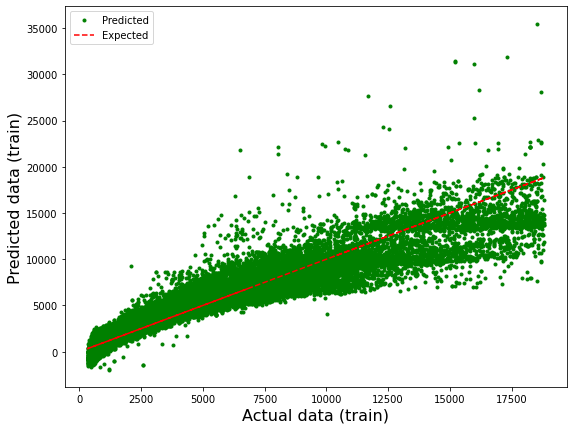

In [253]:
# Actual vs predicted for train dataset
plt.figure(figsize=(9,7))
plt.plot(Y_train, pred_train, 'g.', label="Predicted")
plt.xlabel('Actual data (train)', fontsize=16)
plt.ylabel('Predicted data (train)', fontsize=16)
plt.plot(Y_train, Y_train, 'r', linestyle='--', label="Expected")
plt.legend()

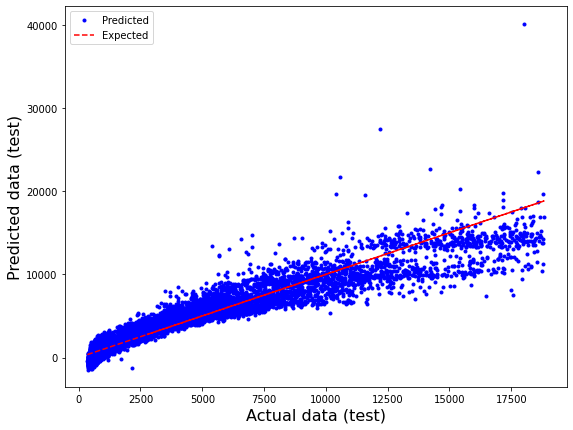

In [258]:
# Actual vs predicted for test dataset
plt.figure(figsize=(9,7))
plt.plot(Y_test, pred_test, 'b.', label="Predicted")
plt.xlabel('Actual data (test)', fontsize=16)
plt.ylabel('Predicted data (test)', fontsize=16)
plt.plot(Y_test, Y_test, 'r', linestyle='--', label="Expected")
plt.legend()

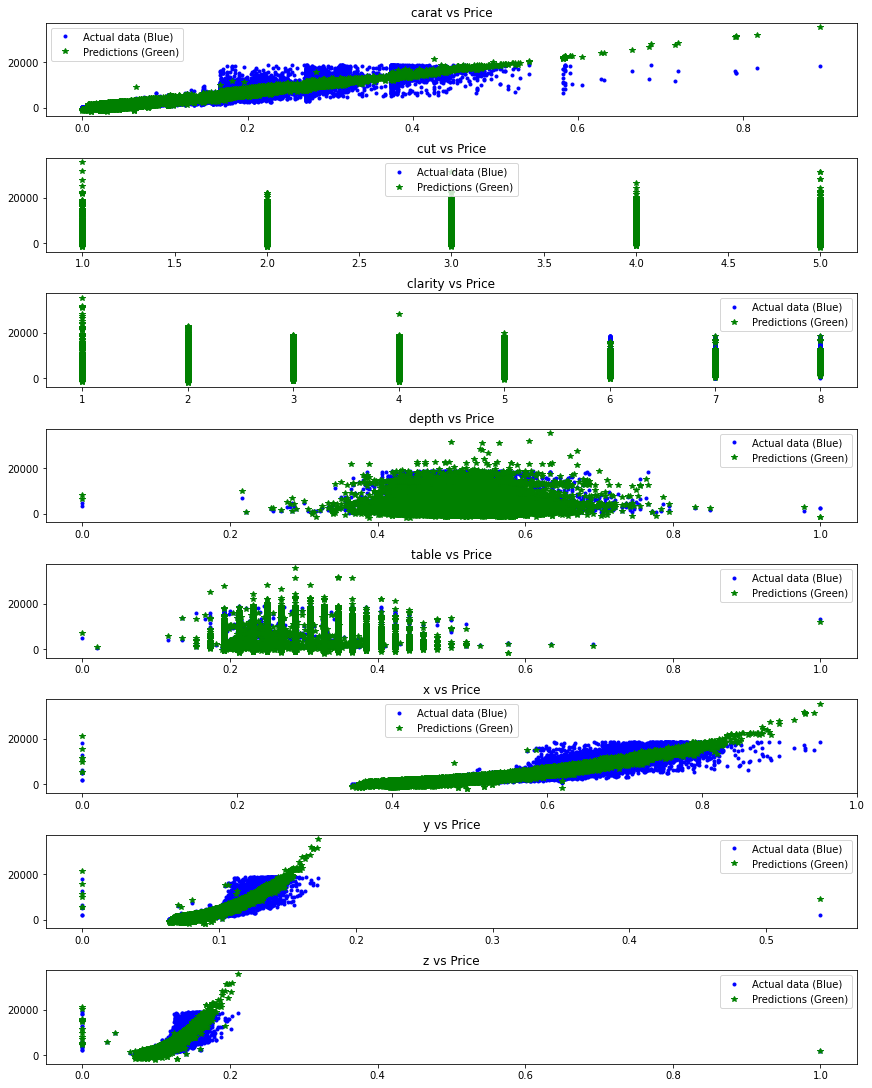

In [259]:
# Actual vs predicted data for differnt input features
fig, axs = plt.subplots(8, constrained_layout=True, figsize=(12,15))
#fig.suptitle('Linear Regression OLS - Predictions vs Actual data')
col_names = X_train.columns

for i in range(len(col_names)):
  axs[i].plot(X_train.values[:, i], Y_train, 'b.', label="Actual data (Blue)")
  axs[i].plot(X_train.values[:, i], pred_train, 'g*', label="Predictions (Green)")
  axs[i].set_title(col_names[i]+ ' vs Price')
  axs[i].legend()
  #axs[i].xlabel(col_names[i])
  #axs[i].ylabel(col_names[i])
  

# Part-4 Ridge Regression

In [312]:
class RidgeRegression:

  def __init__(self, reg_lambda=0.1, bias=True, seed=seed_val):
    self.weights = 0
    self.is_bias = bias
    self.reg_lambda = reg_lambda

  def add_bias(self, X):
    '''
      Input:
        feature matrix, X
      Return:
        feature matrix with bias column of value 1
    '''
    bias_vector = np.ones((X.shape[0], 1))  #  creating bias vector (N x 1), where N is the number of samples
    return np.concatenate((bias_vector, X), axis=1)  # concatenating bias vector with input features


  def calculate_weight(self, X, Y):
    '''
      Input:
        feature matrix, X
        target, Y
      Return:
        weight vector
    '''
    identity_matrix = np.identity(X.shape[1]) # identity matrix, D x D, D = number of features
    regularization = self.reg_lambda * identity_matrix
    inverse = np.linalg.inv(np.dot(X.T, X) + regularization)
    weight = np.dot(inverse, np.dot(X.T, Y))
    return weight


  def fit(self, X, Y):
    '''
      Input:
        X: Input feature matrix
        Y: target values
        bias: Boolean - indicates 
    '''
    if self.is_bias:
      X = self.add_bias(X)

    self.weights = self.calculate_weight(X, Y)
    return self.weights


  def predict(self, X):
    if self.is_bias:
      X = self.add_bias(X)
    return np.dot(X, self.weights)


  def get_weights(self):
    return self.weights


  def mse_score(self, true_val, predicted):
    '''
      Input:
        true_val : the ground truth value 
        predicted : values calculated using OLS
      Return:
        mean square error value
    '''
    return ((true_val - predicted)**2).mean()

In [313]:
def find_lambda(X, Y):
  '''
    Input:
      X = feature matrix
      Y = target values
    Return:
      Lambda - regulariation parameter - that minimize the MSE of train data
  '''
  loss = []
  for i in np.arange(0.1, 30, 0.1):
    model_ridge = RidgeRegression(reg_lambda=i)
    model_ridge.fit(X, Y)
    pred_train = model_ridge.predict(X)
    error = model_ridge.mse_score(Y, pred_train)
    loss.append([i, error])
  return min(loss, key=lambda x: x[1])

In [422]:
# Lambda value that results in minimum MSE for the training data
find_lambda(X_train, Y_train)

[0.1, 1769944.032691985]

In [423]:
model_ridge = RidgeRegression(reg_lambda=0.3)
model_ridge.fit(X_train, Y_train)
pred_train = model_ridge.predict(X_train)
print("Mean Squared Error, Train : ", model_ridge.mse_score(Y_train, pred_train))

pred_test = model_ridge.predict(X_test)
print("Mean Squared Error, Test : ", model_ridge.mse_score(Y_test, pred_test))

Mean Squared Error, Train :  1770595.981447074
Mean Squared Error, Test :  1680865.2877800234


In [424]:
model_ridge.get_weights()

array([ 1950.81064303, 47065.16165921,    99.87944331,   463.80440904,
       -3504.62787064, -2567.71936692, -7915.56126002,  6701.1041649 ,
        -168.11145203])

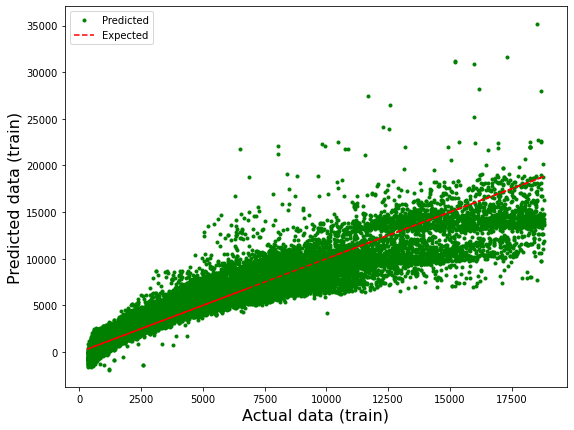

In [425]:
# Actual vs predicted for train dataset
plt.figure(figsize=(9,7))
plt.plot(Y_train, pred_train, 'g.', label="Predicted")
plt.xlabel('Actual data (train)', fontsize=16)
plt.ylabel('Predicted data (train)', fontsize=16)
plt.plot(Y_train, Y_train, 'r', linestyle='--', label="Expected")
plt.legend()

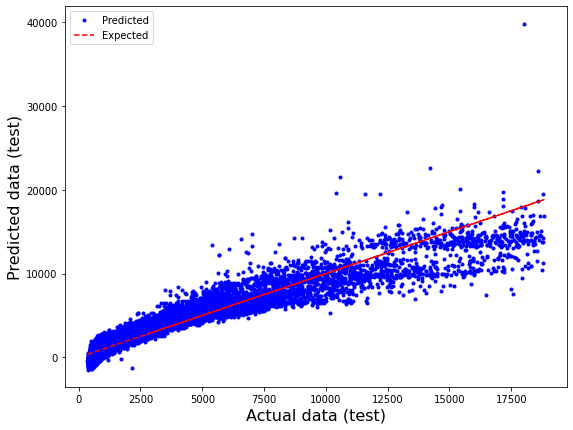

In [426]:
# Actual vs predicted for test dataset
plt.figure(figsize=(9,7))
plt.plot(Y_test, pred_test, 'b.', label="Predicted")
plt.xlabel('Actual data (test)', fontsize=16)
plt.ylabel('Predicted data (test)', fontsize=16)
plt.plot(Y_test, Y_test, 'r', linestyle='--', label="Expected")
plt.legend()

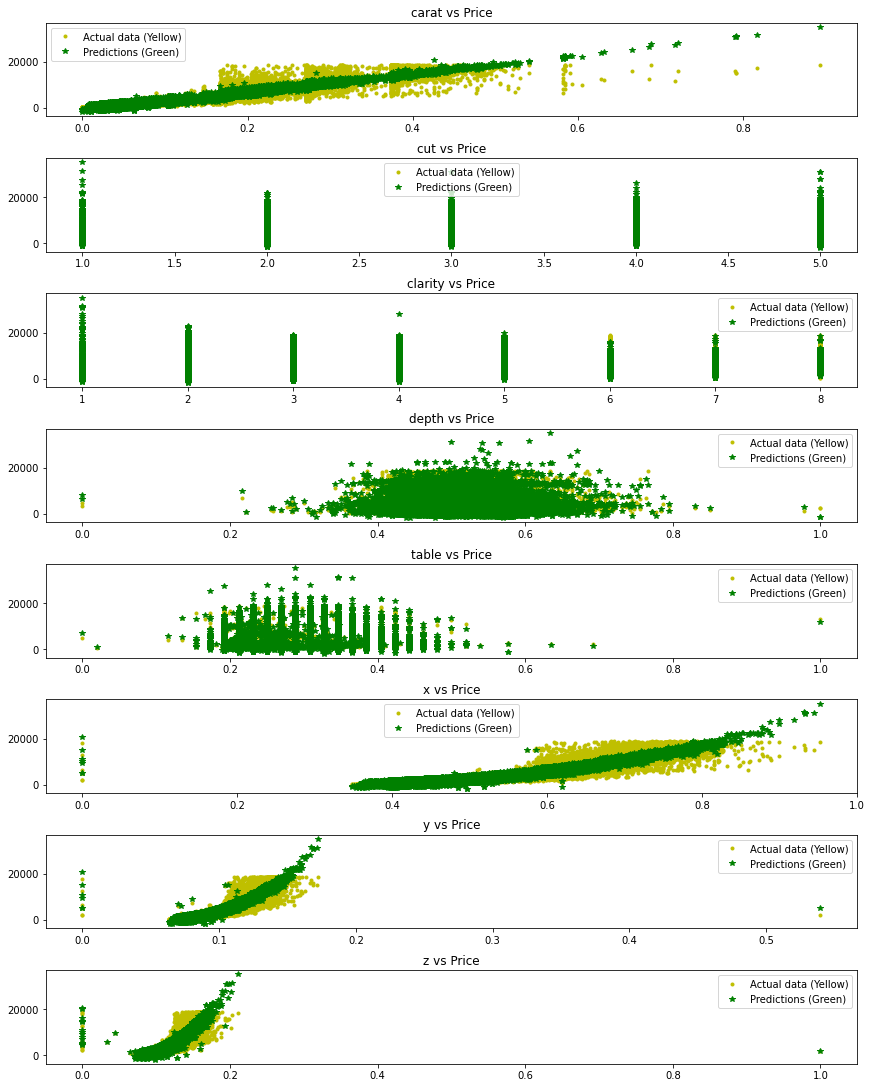

In [320]:
fig, axs = plt.subplots(8, constrained_layout=True, figsize=(12,15))
#fig.suptitle('Ridge Regression - Predictions vs Actual data')
col_names = X_train.columns

for i in range(len(col_names)):
  axs[i].plot(X_train.values[:, i], Y_train, 'y.', label="Actual data (Yellow)")
  axs[i].plot(X_train.values[:, i], pred_train, 'g*', label="Predictions (Green)")
  axs[i].set_title(col_names[i]+ ' vs Price')
  axs[i].legend()

## BONUS - Ridge Regression using gradient descent

In [311]:
X_train

,carat,cut,clarity,depth,table,x,y,z
17081,0.232848,3,3,0.530556,0.269231,0.650838,0.120374,0.137421
15162,0.278586,4,2,0.522222,0.269231,0.691806,0.124788,0.143711
7653,0.145530,2,4,0.572222,0.288462,0.566108,0.103905,0.122013
757,0.108108,5,3,0.530556,0.288462,0.536313,0.097284,0.112264
14426,0.166320,4,4,0.536111,0.250000,0.594041,0.107980,0.124843
...,...,...,...,...,...,...,...,...
52529,0.116424,3,2,0.527778,0.211538,0.543762,0.100340,0.114465
29743,0.024948,4,7,0.508333,0.250000,0.410615,0.075212,0.085220
8527,0.166320,5,3,0.477778,0.307692,0.605214,0.108489,0.122013
32132,0.043659,5,2,0.497222,0.288462,0.448790,0.081494,0.092138


In [412]:
class RidgeRegressionGradient:

  def __init__(self, learning_rate=0.1, num_iterations=100, reg_lambda=0.1, bias=True, seed=seed_val):
    self.weights = 0
    self.is_bias = bias
    self.reg_lambda = reg_lambda
    self.num_iterations = num_iterations
    self.learning_rate = learning_rate
    self.loss = []
    np.random.seed(seed)

  def add_bias(self, X):
    '''
      Input:
        feature matrix, X
      Return:
        feature matrix with bias column of value 1
    '''
    bias_vector = np.ones((X.shape[0], 1))  #  creating bias vector (N x 1), where N is the number of samples
    return np.concatenate((bias_vector, X), axis=1)  # concatenating bias vector with input features


  def get_loss(self):
    # return training loss
    return self.loss


  def cost(self, X, y):
    '''
      Loss function for Ridge Regression
      parameters:
        X - input features
        y - target vector
      return:
        loss value
    '''
    z = np.dot(X, self.weights) 
    error = z - y

    return (np.dot(error.T, error) + self.reg_lambda*np.dot(self.weights.T, self.weights)) / len(y)


  def gradient_descent(self, X, y):
    '''
      Gradient Descent
    '''
    
    z = np.dot(X, self.weights) 
    error = z - y
    regularization = self.reg_lambda*self.weights

    # Gradient - derivate of the loss function
    gradient = (np.dot(X.T, error) + regularization)/len(y)

    # Weight update
    self.weights -= self.learning_rate * gradient


  def fit(self, X, y):
    '''
      Input:
        X: Input feature matrix
        Y: target values
        bias: Boolean - indicates 
    '''
    if self.is_bias:
      X = self.add_bias(X)

    # initializing weights vector with random values from uniform distribution
    self.weights = np.array([np.random.uniform(0,1) for i in range(X.shape[1])])

    for i in range(self.num_iterations):
      
      cost_fn = self.cost(X, y)
      if np.isnan(cost_fn):
        print(f'Iteration = {i} - loss: {cost_fn} \t')
        break
      self.gradient_descent(X, y)
      self.loss.append(cost_fn)

      if (i % 10000 == 0):
        #print(cost_fn)
        #print(self.weights)
        print(f'Iteration {i} - loss: {cost_fn} \t')


  def predict(self, X):
    #  Returns dot product of the weights and feature matrix
    if self.is_bias:
      X = self.add_bias(X)
    return np.dot(X, self.weights)


  def get_weights(self):
    return self.weights


  def mse_score(self, true_val, predicted):
    '''
      Input:
        true_val : the ground truth value 
        predicted : values calculated using gradient descent
      Return:
        mean square error value
    '''
    return ((true_val - predicted)**2).mean()

In [413]:
%timeit

# RidgeRegressionGradient class instance
model = RidgeRegressionGradient(bias=False, learning_rate=0.03, num_iterations=100000, reg_lambda=0.03, seed=seed_val) 

# Train the model
model.fit(X_train, Y_train)

Iteration 0 - loss: 31321339.822398003 	
Iteration 10000 - loss: 2207203.2274263324 	
Iteration 20000 - loss: 2068583.5357712512 	
Iteration 30000 - loss: 1997167.876645237 	
Iteration 40000 - loss: 1944767.606919168 	
Iteration 50000 - loss: 1905332.8559101804 	
Iteration 60000 - loss: 1875398.3748685247 	
Iteration 70000 - loss: 1852603.0284519298 	
Iteration 80000 - loss: 1835223.607218306 	
Iteration 90000 - loss: 1821967.188998504 	


In [420]:
# Updated weights after iterations 11 mins training
model.get_weights()

array([39425.56786922,    67.92101237,   466.13413689, -4470.7447909 ,
       -3863.3889629 ,   282.09698283,   255.62396937,   999.37357752])

In [421]:
# Prediction
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# MSE
train_score = model.mse_score(Y_train, y_pred_train)
test_score = model.mse_score(Y_test, y_pred_test)

print(f'MSE on Train data = {train_score}')
print(f'MSE on Test data = {test_score}')

MSE on Train data = 1810747.6483930426
MSE on Test data = 1743496.9831389575


Text(0, 0.5, 'Training loss')

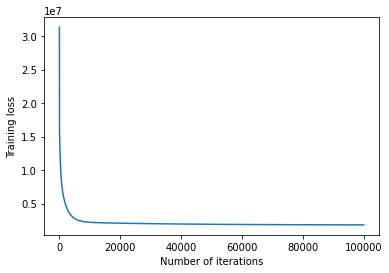

In [416]:
# Training loss plot for iterations
plt.plot(model.get_loss())
plt.xlabel("Number of iterations")
plt.ylabel("Training loss")

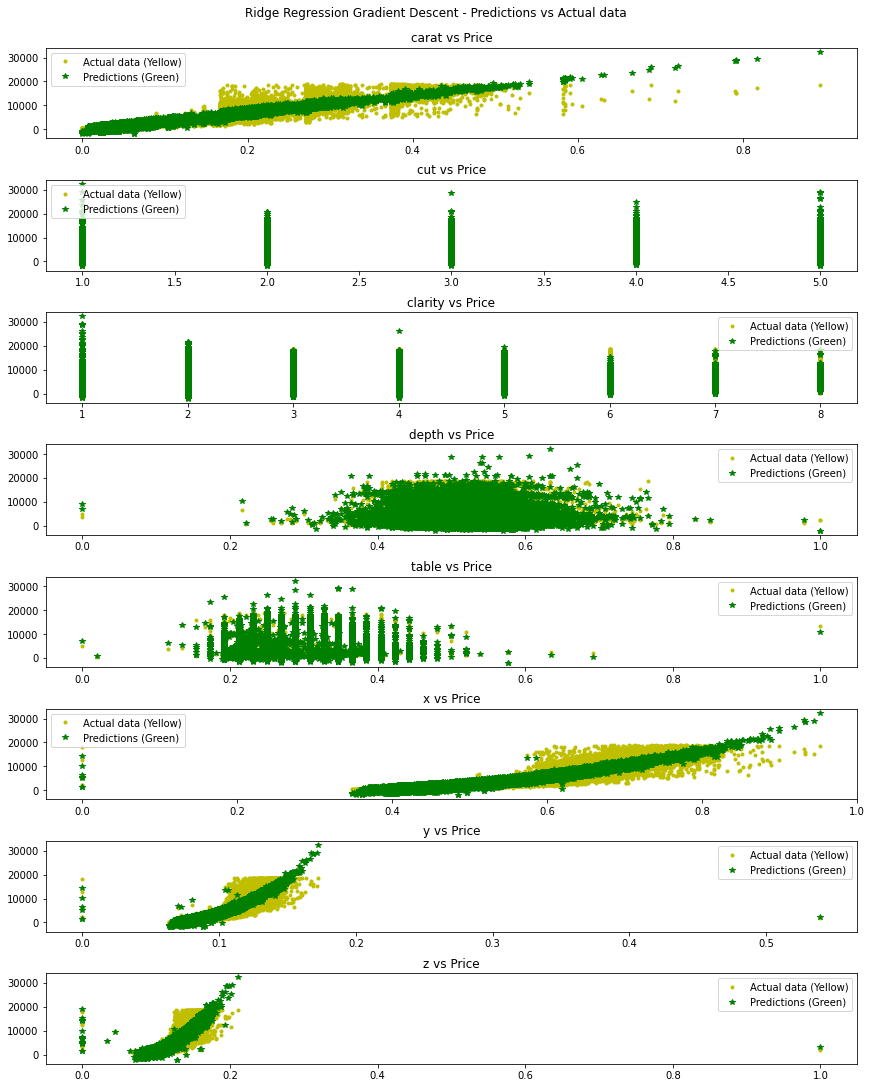

In [419]:
fig, axs = plt.subplots(8, constrained_layout=True, figsize=(12,15))
fig.suptitle('Ridge Regression Gradient Descent - Predictions vs Actual data')
col_names = X_train.columns

for i in range(len(col_names)):
  axs[i].plot(X_train.values[:, i], Y_train, 'y.', label="Actual data (Yellow)")
  axs[i].plot(X_train.values[:, i], y_pred_train, 'g*', label="Predictions (Green)")
  axs[i].set_title(col_names[i]+ ' vs Price')
  axs[i].legend()

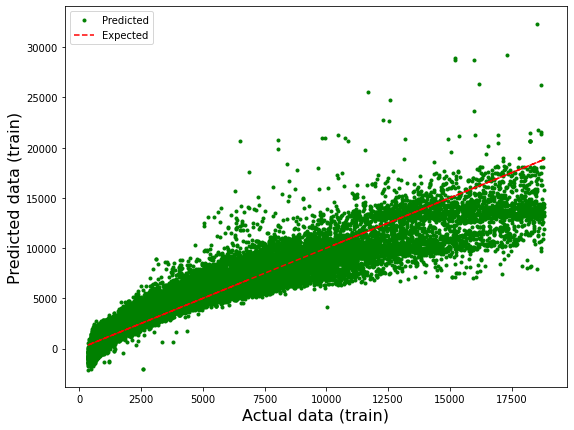

In [402]:
# Actual vs predicted for train dataset
plt.figure(figsize=(9,7))
plt.plot(Y_train, y_pred_train, 'g.', label="Predicted")
plt.xlabel('Actual data (train)', fontsize=16)
plt.ylabel('Predicted data (train)', fontsize=16)
plt.plot(Y_train, Y_train, 'r', linestyle='--', label="Expected")
plt.legend()

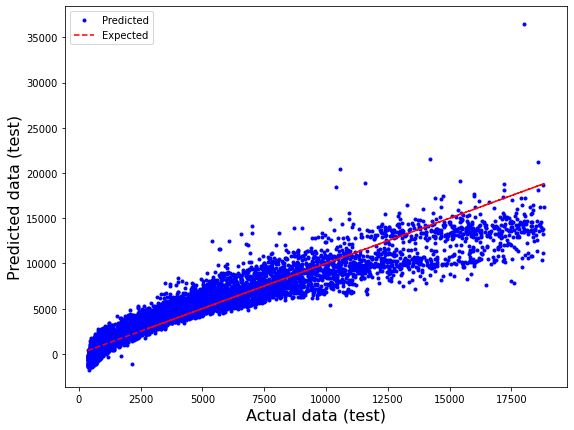

In [403]:
# Actual vs predicted for test dataset
plt.figure(figsize=(9,7))
plt.plot(Y_test, y_pred_test, 'b.', label="Predicted")
plt.xlabel('Actual data (test)', fontsize=16)
plt.ylabel('Predicted data (test)', fontsize=16)
plt.plot(Y_test, Y_test, 'r', linestyle='--', label="Expected")
plt.legend()

# References

Numpy Documentation - https://numpy.org/doc/stable/reference/

Pandas Documentation - https://pandas.pydata.org/docs/reference/

Matplotlib Documentation - https://matplotlib.org/stable/index.html#matplotlib-release-documentation

Python Documentation - https://docs.python.org/3.9/library/index.html

Penguin Dataset - https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris

Lecture slide titled ‘Ordinary Least Square (OLS) and Regularization'

CS229 Machine Learning lecture notes - https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf
